# Basic model
##### - no feature engineering
##### - excluded variable time (high correlation with DEATH_EVENT, feedback loop)

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

seed = 42

In [36]:
# Read the data
path = "/Users/hubertmagdziak/Desktop/ML-heart-failure-prediction/heart_failure_clinical_records_dataset.csv"
df = pd.read_csv(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Correlation between 'time' and 'DEATH_EVENT': -0.54


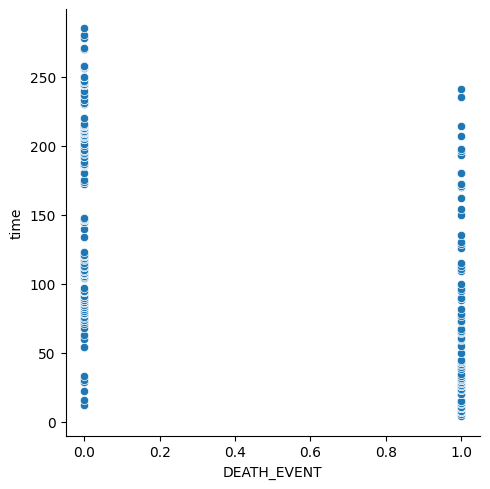

In [37]:
# Examine high correlation between "time" and "DEATH_EVENT"
sns.relplot(data=df,
            y="time",
            x="DEATH_EVENT",
            kind="scatter")

# Correlation value
print(f"Correlation between 'time' and 'DEATH_EVENT': {df[['time', 'DEATH_EVENT']].corr('spearman').values[0,1]:.2f}")

In [38]:
# Split the data into training and testing
df_modelling = df.drop(columns=["time"])
X = df_modelling.drop(columns=["DEATH_EVENT"])
y = df_modelling["DEATH_EVENT"]
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    shuffle=True,
    stratify=y,
    random_state=seed
)
print(f"X_train shape: {X_train.shape}\n")
print(f"X_test shape: {X_test.shape}\n")
print(f"y_train shape: {y_train.shape}\n")
print(f"y_test shape: {y_test.shape}\n")

X_train shape: (224, 11)

X_test shape: (75, 11)

y_train shape: (224,)

y_test shape: (75,)



In [39]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_elastic_net = log_reg.predict(X_test)
y_pred_proba_elastic_net = log_reg.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred_elastic_net))
print(confusion_matrix(y_test, y_pred_elastic_net))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81        51
           1       0.59      0.42      0.49        24

    accuracy                           0.72        75
   macro avg       0.67      0.64      0.65        75
weighted avg       0.70      0.72      0.71        75

[[44  7]
 [14 10]]


In [65]:
y.mean()

0.3210702341137124

In [69]:
print(classification_report(y_test, y_pred_proba_elastic_net >= y.mean()))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75        51
           1       0.48      0.54      0.51        24

    accuracy                           0.67        75
   macro avg       0.63      0.63      0.63        75
weighted avg       0.68      0.67      0.67        75

